In [1]:
import sys

sys.path.append("..")
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from dory.linear.ols import OrdinaryLeastSquaresRegressor
from dory.scaler import NonCombinatoryExplosionPolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import logging

logging.basicConfig(level=logging.INFO)

In [2]:
def root_mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    error = y_true - y_pred
    return np.sqrt(np.mean(error**2))

In [3]:
california_df = pd.read_csv("california.csv", header=None)
california_df.describe()

,0,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.948099,28.733000,5.417844,1.087299,1423.847000,2.897038,35.765440,-119.708800,2.111088
std,1.873914,12.961239,1.875375,0.285668,1396.022801,0.763631,2.197077,2.023945,1.142300
min,0.706800,2.000000,1.411290,0.526316,9.000000,1.345506,32.550000,-124.180000,0.325000
25%,2.674075,18.000000,4.458198,1.006177,774.500000,2.408481,33.920000,-121.880000,1.242500
50%,3.667450,29.000000,5.281518,1.046735,1169.500000,2.794112,34.420000,-118.905000,1.850500
75%,4.788375,38.000000,6.031825,1.097236,1681.000000,3.248397,37.760000,-118.040000,2.695500
max,15.000000,52.000000,26.465969,5.424084,28566.000000,9.196203,41.860000,-115.490000,5.000010


In [4]:

X = california_df.iloc[:, :-1].to_numpy()
y = california_df.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 8) (200, 8) (800,) (200,)


In [5]:
features_names = california_df.columns[:-1]
target_name = california_df.columns[-1]
feature_scaler = MinMaxScaler()
target_scaler = StandardScaler()

# Normalizing features and target
X_train = feature_scaler.fit_transform(X_train)
y_train = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# Using only transform to avoid data leakage
X_test =feature_scaler.transform(X_test)
y_test = target_scaler.transform(y_test.reshape(-1, 1)).flatten()
pd.DataFrame(y_train).describe()

,0
count,8.000000e+02
mean,-3.153033e-16
std,1.000626e+00
min,-1.548903e+00
25%,-7.579848e-01
50%,-2.537401e-01
75%,5.031620e-01
max,2.451690e+00


In [6]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.228198,0.531125,0.173483,0.159820,0.049425,0.196727,0.344650,0.513140
std,0.133920,0.258254,0.080486,0.077415,0.050736,0.096423,0.235019,0.232825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139173,0.300000,0.129117,0.136414,0.027034,0.134698,0.145048,0.263521
50%,0.207473,0.520000,0.169550,0.147727,0.040848,0.182651,0.203983,0.594937
75%,0.288854,0.720000,0.202630,0.162661,0.057867,0.239631,0.559742,0.707710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
pipe = Pipeline(
    [
        ("poly", NonCombinatoryExplosionPolynomialFeatures()),
        # Scale to min max again after generating non linear table
        ("scaler", MinMaxScaler()),
        ("regressor", OrdinaryLeastSquaresRegressor()),
    ]
)
pipe

,steps,"[('poly', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,feature_range,"(0, ...)"
,copy,True
,clip,False
,fit_intercept,True
,l2_alpha,0.0


In [8]:
folds = 5
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid={
        "poly__degree": range(1, 13 + 1),
        "regressor__l2_alpha": [0.0, 0.1, 0.01, 1.0, 100],
    },
    cv=folds,
    verbose=2,
)

In [9]:
grid_search.fit(X_train, y_train)


INFO:dory.linear.ols:Using L2 regularization with alpha 0.1


INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regul

Fitting 5 folds for each of 65 candidates, totalling 325 fits
[CV] END ............poly__degree=1, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=1, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=1, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=1, regressor__

INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regul

[CV] END ............poly__degree=5, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=5, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=5, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ............poly__degree=5, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=5, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=5, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=5, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=5, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=5, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=5, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=5, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=5, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__de

INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regul

[CV] END ............poly__degree=6, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=6, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=6, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=6, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=6, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=6, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=6, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=6, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=6, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=6, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ............poly__degree=6, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ............poly__degree=6, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ............poly__d

INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 100


[CV] END ............poly__degree=9, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=9, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=9, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=9, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=9, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=9, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ............poly__d

INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regul

[CV] END ............poly__degree=9, regressor__l2_alpha=100; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=100; total time=   0.0s
[CV] END ............poly__degree=9, regressor__l2_alpha=100; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=10, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__de

INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 100


[CV] END ...........poly__degree=12, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ..........poly__degree=12, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ..........poly__degree=12, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ..........poly__degree=12, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ..........poly__degree=12, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ..........poly__degree=12, regressor__l2_alpha=0.01; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=1.0; total time=   0.0s
[CV] END ...........poly__de

INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 100
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 0.01
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regularization with alpha 1.0
INFO:dory.linear.ols:Using L2 regul

[CV] END ...........poly__degree=12, regressor__l2_alpha=100; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=100; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=100; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=100; total time=   0.0s
[CV] END ...........poly__degree=12, regressor__l2_alpha=100; total time=   0.0s
[CV] END ...........poly__degree=13, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=13, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=13, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=13, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=13, regressor__l2_alpha=0.0; total time=   0.0s
[CV] END ...........poly__degree=13, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__degree=13, regressor__l2_alpha=0.1; total time=   0.0s
[CV] END ...........poly__de

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'poly__degree': range(1, 14), 'regressor__l2_alpha': [0.0, 0.1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,2


In [10]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_
y_test_pred = best_estimator.predict(X_test)
denormalized_y_test_pred = target_scaler.inverse_transform(y_test_pred.reshape(1, -1)).flatten()
denormalized_y_test = target_scaler.inverse_transform(y_test.reshape(1, -1)).flatten()

In [11]:
rmse = root_mean_squared_error(denormalized_y_test, denormalized_y_test_pred)
print(f"Best params {best_params}")
print(f"Test RMSE {rmse}")

Best params {'poly__degree': 2, 'regressor__l2_alpha': 0.1}
Test RMSE 0.6595255625826147


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42069
)

/var/folders/bj/s5pcvzbn6kxbfc_lky95q7400000gn/T/ipykernel_87762/3404836934.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


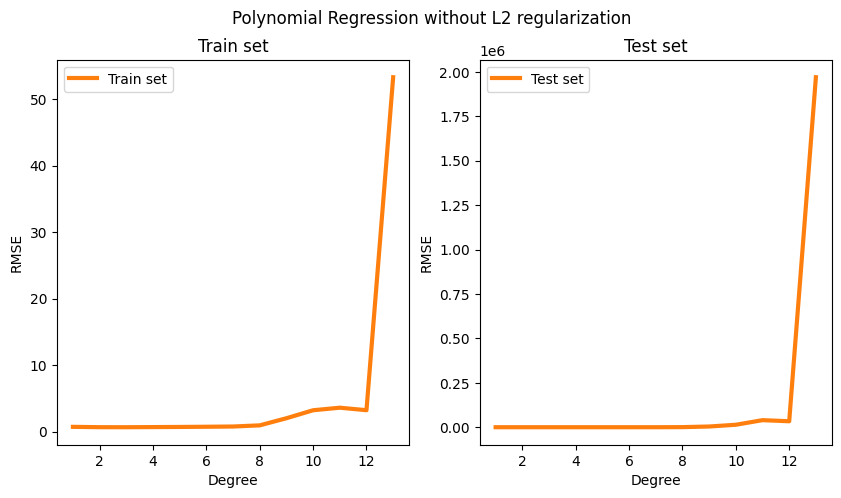

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

train_points = {"degree": [], "rmse": []}
test_points = {"degree": [], "rmse": []}
denormalized_y_val = target_scaler.inverse_transform(y_val.reshape(1, -1)).flatten()


for i in range(1, 13 + 1):
    poly: NonCombinatoryExplosionPolynomialFeatures = pipe.named_steps["poly"]
    poly.set_params(degree=i)
    pipe.fit(X_train, y_train)

    y_val_pred = pipe.predict(X_val)
    denormalized_y_val_pred = target_scaler.inverse_transform(y_val_pred.reshape(1, -1)).flatten()
    rmse_validation = root_mean_squared_error(denormalized_y_val, denormalized_y_val_pred)

    y_test_pred = pipe.predict(X_test)
    denormalized_y_test_pred = target_scaler.inverse_transform(y_test_pred.reshape(1, -1)).flatten()
    rmse_test = root_mean_squared_error(denormalized_y_test, denormalized_y_test_pred)

    train_points["degree"].append(i)
    train_points["rmse"].append(rmse_validation)

    test_points["degree"].append(i)
    test_points["rmse"].append(rmse_test)



ax[0].plot(
    train_points["degree"],
    train_points["rmse"],
    linewidth=3,
    color="tab:orange",
    label="Train set",
)
ax[0].set(xlabel="Degree", ylabel="RMSE", title="Train set")
ax[0].legend()

ax[1].plot(
    test_points["degree"],
    test_points["rmse"],
    linewidth=3,
    color="tab:orange",
    label="Test set",
)
ax[1].set(xlabel="Degree", ylabel="RMSE", title="Test set")
ax[1].legend()

fig.suptitle("Polynomial Regression without L2 regularization")

fig.show()

INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
INFO:dory.linear.ols:Using L2 regularization with alpha 0.1
/var/folders/bj/s5pcvzbn6kxbfc_lky95q7400000gn/T/ipykernel_87762/3462568911.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


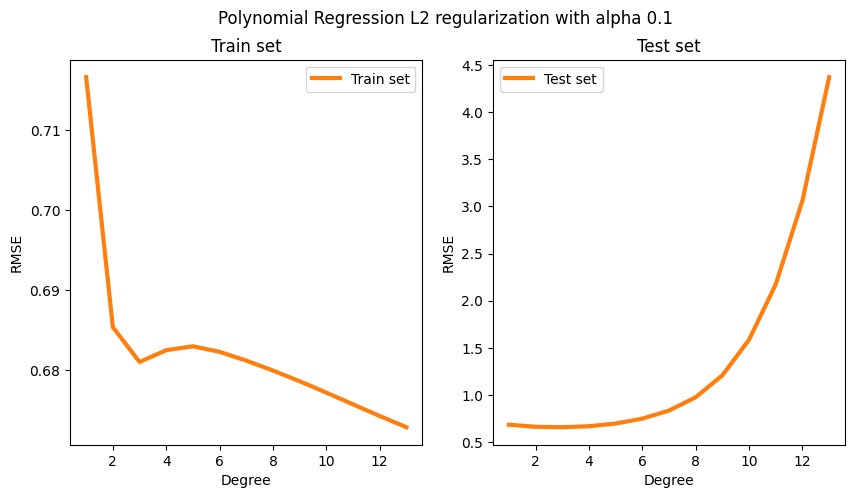

In [14]:

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

train_points = {"degree": [], "rmse": []}
test_points = {"degree": [], "rmse": []}

regressor: OrdinaryLeastSquaresRegressor = pipe.named_steps["regressor"]
regressor.set_params(l2_alpha=0.1)

for i in range(1, 13 + 1):
    poly: NonCombinatoryExplosionPolynomialFeatures = pipe.named_steps["poly"]
    poly.set_params(degree=i)
    pipe.fit(X_train, y_train)

    y_val_pred = pipe.predict(X_val)
    denormalized_y_val_pred = target_scaler.inverse_transform(y_val_pred.reshape(1, -1)).flatten()
    rmse_validation = root_mean_squared_error(denormalized_y_val, denormalized_y_val_pred)

    y_test_pred = pipe.predict(X_test)
    denormalized_y_test_pred = target_scaler.inverse_transform(y_test_pred.reshape(1, -1)).flatten()
    rmse_test = root_mean_squared_error(denormalized_y_test, denormalized_y_test_pred)

    train_points["degree"].append(i)
    train_points["rmse"].append(rmse_validation)

    test_points["degree"].append(i)
    test_points["rmse"].append(rmse_test)



ax[0].plot(
    train_points["degree"],
    train_points["rmse"],
    linewidth=3,
    color="tab:orange",
    label="Train set",
)
ax[0].set(xlabel="Degree", ylabel="RMSE", title="Train set")
ax[0].legend()

ax[1].plot(
    test_points["degree"],
    test_points["rmse"],
    linewidth=3,
    color="tab:orange",
    label="Test set",
)
ax[1].set(xlabel="Degree", ylabel="RMSE", title="Test set")
ax[1].legend()

fig.suptitle("Polynomial Regression L2 regularization with alpha 0.1")

fig.show()